### VGG16

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
Xtrain = np.load('Xtrain.npz')
Xtrain = Xtrain['x']
Ytrain = np.load('Ytrain.npz')
Ytrain = Ytrain['y']

In [3]:
Xtest = np.load('Xtest.npz')
Xtest = Xtest['x']
Ytest = np.load('Ytest.npz')
Ytest = Ytest['y']

In [4]:
Xval = np.load('Xval.npz')
Xval = Xval['x']
Yval = np.load('Yval.npz')
Yval = Yval['y']

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Xtrain.shape[1], Xtrain.shape[2], 3))

In [6]:
Xtrain = np.expand_dims(Xtrain, axis=-1)
Xtrain = np.repeat(Xtrain, 3, axis=-1)

In [7]:
Xtest = np.expand_dims(Xtest, axis=-1)
Xtest = np.repeat(Xtest, 3, axis=-1)

In [8]:
Xval = np.expand_dims(Xval, axis=-1)
Xval = np.repeat(Xval, 3, axis=-1)

In [9]:
base_model.trainable = False

In [10]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(Xtrain, Ytrain, epochs=15, batch_size=32, validation_data=(Xval, Yval))

Epoch 1/15
92/92 [==============================] - 1025s 11s/step - loss: 6.2916 - accuracy: 0.6157 - val_loss: 0.9579 - val_accuracy: 0.6667
Epoch 2/15
92/92 [==============================] - 799s 9s/step - loss: 0.8683 - accuracy: 0.7154 - val_loss: 0.9070 - val_accuracy: 0.7186
Epoch 3/15
92/92 [==============================] - 747s 8s/step - loss: 0.7002 - accuracy: 0.7413 - val_loss: 0.8761 - val_accuracy: 0.7049
Epoch 4/15
92/92 [==============================] - 1451s 16s/step - loss: 0.6055 - accuracy: 0.7457 - val_loss: 0.8150 - val_accuracy: 0.7213
Epoch 5/15
92/92 [==============================] - 1469s 16s/step - loss: 0.5370 - accuracy: 0.7584 - val_loss: 0.8839 - val_accuracy: 0.7049
Epoch 6/15
92/92 [==============================] - 1259s 14s/step - loss: 0.5100 - accuracy: 0.7768 - val_loss: 0.8871 - val_accuracy: 0.7186
Epoch 7/15
92/92 [==============================] - 1115s 12s/step - loss: 0.4339 - accuracy: 0.8191 - val_loss: 0.9840 - val_accuracy: 0.7186
Epo

In [13]:
test_loss, test_acc = model.evaluate(Xtest, Ytest)
print('Test accuracy:', test_acc)

12/12 [==============================] - 74s 6s/step - loss: 1.2376 - accuracy: 0.7732
Test accuracy: 0.7732240557670593


In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [16]:
y_pred = model.predict(Xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

12/12 [==============================] - 79s 6s/step


In [18]:
conf_mat = confusion_matrix(Ytest, y_pred_classes)

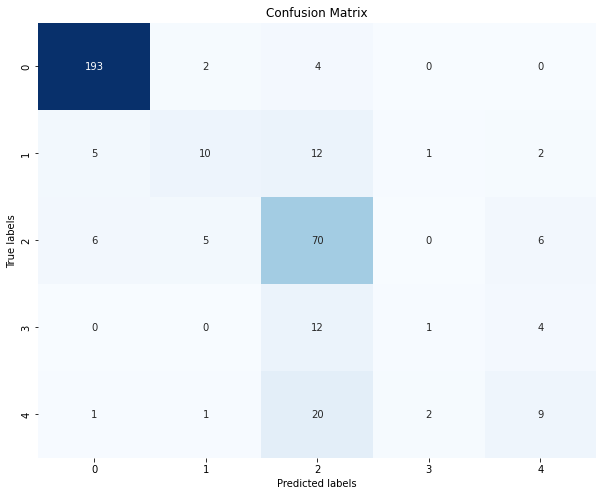

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
 print(classification_report(Ytest, y_pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       199
           1       0.56      0.33      0.42        30
           2       0.59      0.80      0.68        87
           3       0.25      0.06      0.10        17
           4       0.43      0.27      0.33        33

    accuracy                           0.77       366
   macro avg       0.55      0.49      0.50       366
weighted avg       0.75      0.77      0.75       366

